In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
!pip install pgdumplib
!pip install wordcloud

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pgdumplib
import pandas as pd
import numpy as np


In [4]:
dump = pgdumplib.load("/content/tweets2020")

In [5]:
tweets2020 = []
for line in dump.table_data('public', 'status2020'):
    tweets2020.append(line)

In [ ]:
df2020 = pd.DataFrame(data=tweets2020)

In [ ]:
sampled2020 = df2020.sample(int(df2020.shape[0] * 0.2))

In [ ]:
sampled2020.shape

In [ ]:
sampled2020textnoduplicates = sampled2020[2].drop_duplicates()

In [ ]:
sampled2020textnoduplicates.shape

In [ ]:
df2020.shape

In [ ]:
df2020textnoduplicates = df2020[2].drop_duplicates()

In [ ]:
df2020textnoduplicates.shape

In [ ]:
def clear_dirty_text(text, _str="IMPLORO POR SOCORRO!"):
  if _str in text:
    return np.nan


df2020textnodirtytext = df2020textnoduplicates.drop(index=df2020textnoduplicates[df2020textnoduplicates.str.contains("IMPLORO POR SOCORRO")].index)

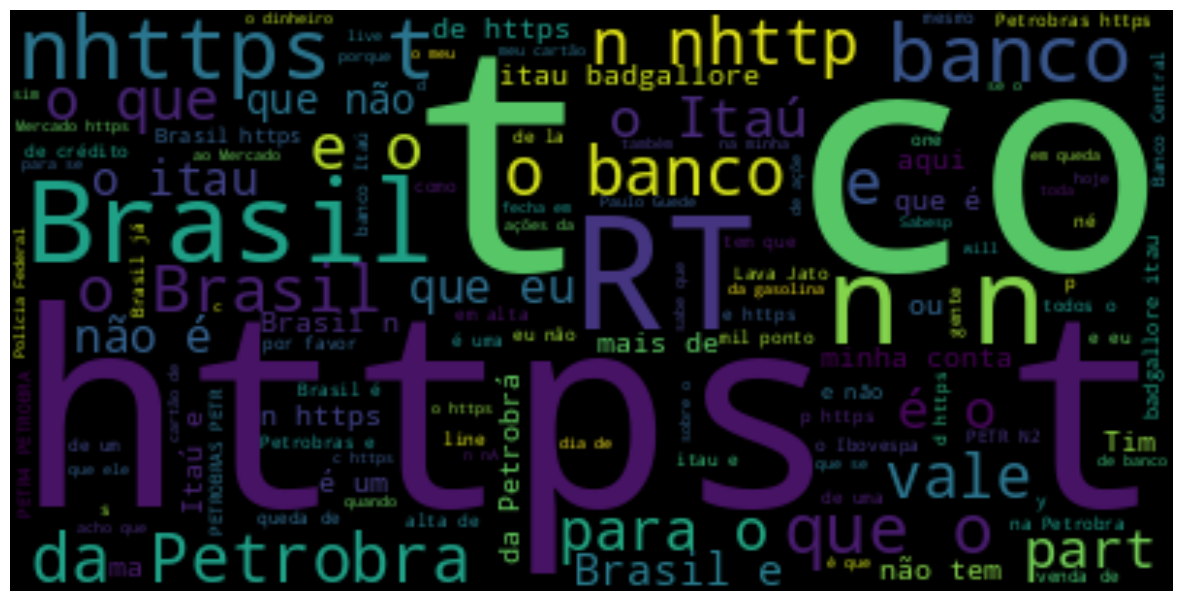

In [ ]:
wordcloud = WordCloud().generate(' '.join(df2020textnodirtytext.sample(int(df2020textnodirtytext.shape[0] * 0.2))))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
import re
def remove_url(text):
  return re.sub(r'http\S+', '', text, flags=re.MULTILINE)
df2020textnoURL = df2020textnodirtytext.apply(remove_url)

In [16]:
def remove_RT(text):
  return re.sub(r'RT', '', text, flags=re.MULTILINE)
df2020textnoRT = df2020textnoURL.apply(remove_RT)

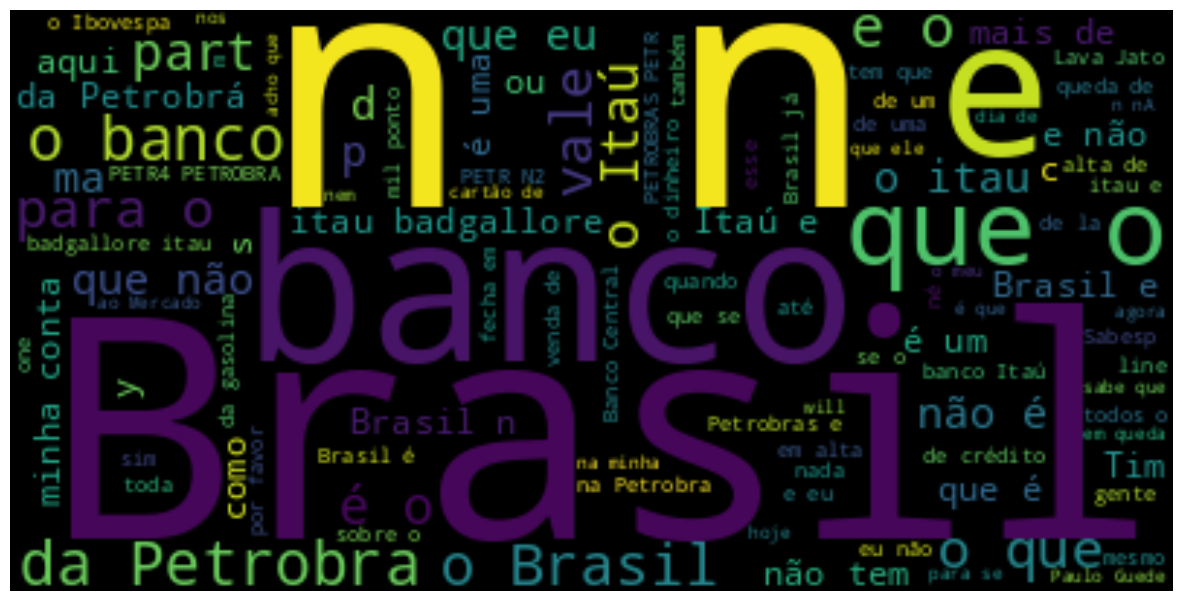

In [ ]:
wordcloud = WordCloud().generate(' '.join(df2020textnoRT.sample(int(df2020textnoRT.shape[0] * 0.2))))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Parte entregue em 28/02 por Marcos Paulo

Observações: foram repetidas funções já feitas anteriormente mas com a sequência alterada.

Sequência Pré Processamento

1- Lowercase

2- Retirar “imploro por socorro”

3- URL

4- Menções (@... )

5- Hashtags

6- Números, símbolos, tudo que não são letras

7- remover idiomas que não sejam PT-BR

8- Normalizador

9- Stopwords

10- Acentos

11 - Palavrões

12- Lematização

13- Tokenização

14- TF-IDF

15- Bag of Words


In [17]:
#Instalação de bibliotecas
!pip install unidecode
!pip install enelvo
#!pip install pyspellchecker stanza
#!pip install https://github.com/explosion/spacy-models/releases/download/pt_core_news_lg-3.0.0/pt_core_news_lg-3.0.0.tar.gz
#!pip install pt_core_news_lg
#!pip install langdetect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 9.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234910 sha256=7efc315369264157f0f0496c8119a5e94040c5529b4e6e788c19ef29c92eed6a
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [18]:
#importação de bibliotecas
import re
import nltk
import unidecode
from enelvo.normaliser import Normaliser
nltk.download('stopwords')
from nltk.corpus import stopwords
#import stanza
#stanza.download('pt')
#import spacy
#import pt_core_news_lg
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#nltk.download('punkt')
#from nltk.tokenize.treebank import TreebankWordDetokenizer
#from nltk.tokenize import word_tokenize
#from langdetect import detect

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
#remoção de valores nulos
df2020_none = df2020textnoduplicates.dropna()

In [20]:
#converter para lowercase
def lowercase(text):

    return text.lower()

df2020_lowercase = df2020_none.apply(lowercase)

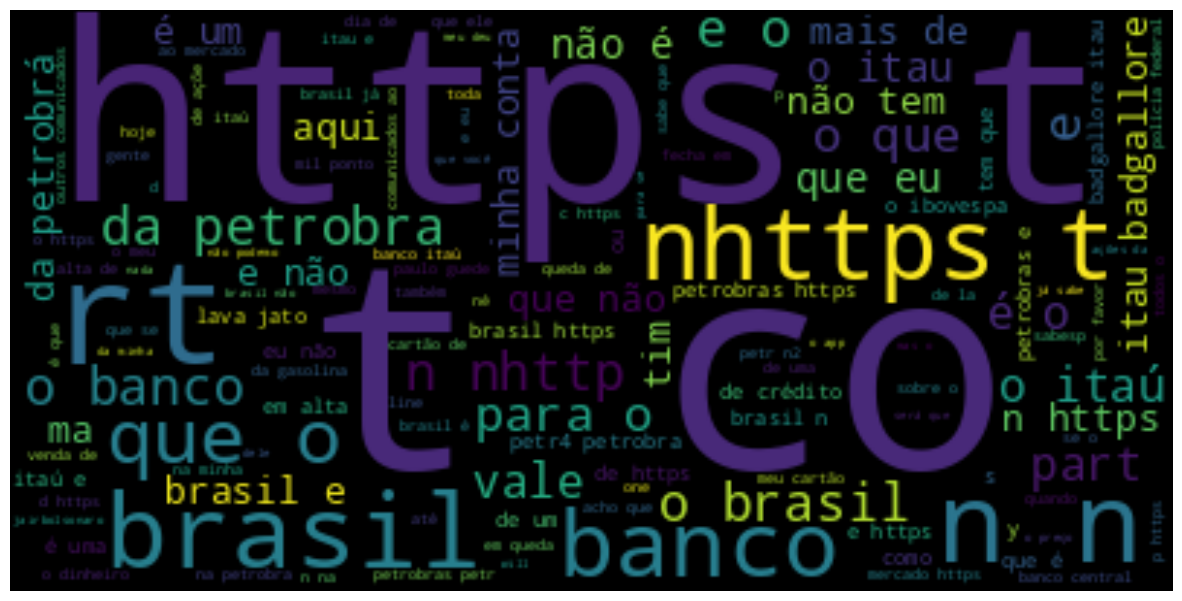

In [21]:
wordcloud = WordCloud().generate(' '.join(df2020_lowercase.sample(int(df2020_lowercase.shape[0] * 0.2))))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
def clear_dirty_text(text, _str="imploro por socorro"):
  if _str in text:
    return np.nan


df2020textnodirtytext = df2020_lowercase.drop(index=df2020_lowercase[df2020_lowercase.str.contains("imploro por socorro")].index)

In [23]:
#remover url
def remove_url(text):
  return re.sub(r'http\S+', '', text, flags=re.MULTILINE)
df2020textnoURL = df2020textnodirtytext.apply(remove_url)

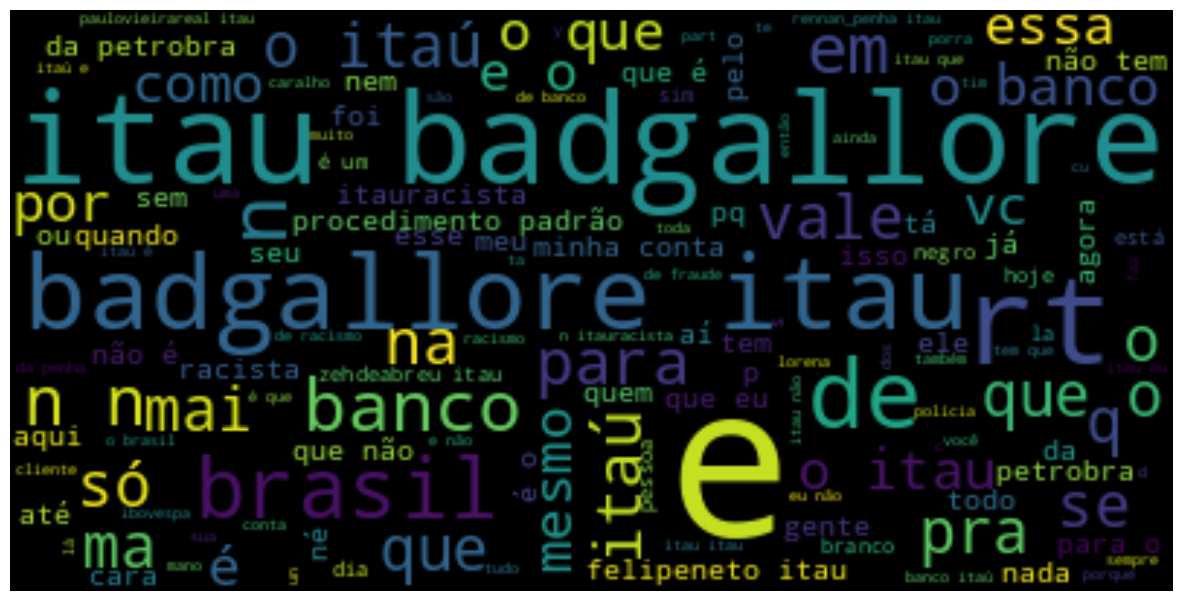

In [ ]:
wordcloud = WordCloud().generate(' '.join(df2020textnoURL.sample(int(df2020textnoURL.shape[0] * 0.2))))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
#remover rt
def remove_RT(text):
  return re.sub(r'rt', '', text, flags=re.MULTILINE)

dftextnoRT = df2020textnoURL.apply(remove_RT)

In [25]:
#remover dados pessoais
#cpf, cep/endereço, telefone e todos os dados pessoais que contém números já foram/vão ser removidos por outras funções pois
#contém caracteres equivalentes

def remove_emails(text):
    padrao_email = r"\S*@\S*\s?"
    no_emails = re.sub(padrao_email, "", text)
    return no_emails

df_email = dftextnoRT.apply(remove_emails)

In [26]:
#remoção de menções

def remove_mentions(text):
  mention_expression = r"(?<!\w)@(\w+)(?!\w)"
  return re.sub(mention_expression,"",text)

df_no_mentions = df_email.apply(remove_mentions)

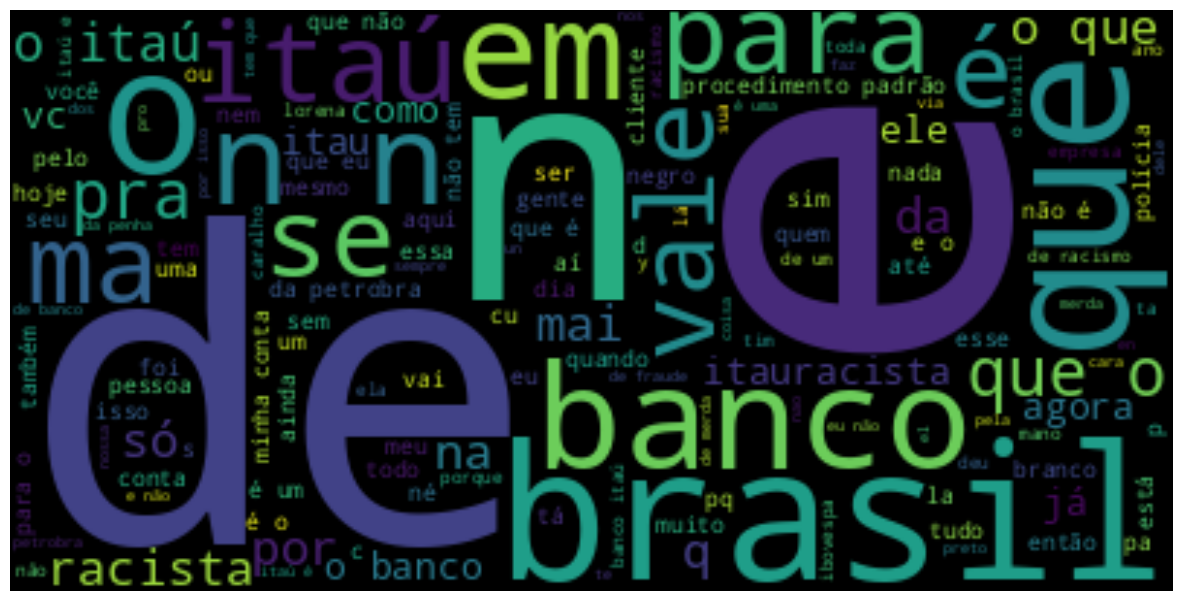

In [ ]:
wordcloud = WordCloud().generate(' '.join(df_no_mentions.sample(int(df_no_mentions.shape[0] * 0.2))))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
#remoção de hashtags
def remove_hashtags(text):
    return re.sub(r"#\w+", "", text)

df_no_hashtag = df_no_mentions.apply(remove_mentions)

In [28]:
#Removendo quebra de linha
df_remove_n = df_no_hashtag.copy()
df_remove_n.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [ ]:
wordcloud = WordCloud().generate(' '.join(df_remove_n.sample(int(df_remove_n.shape[0] * 0.2))))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
#remover símbolos, caracteres especiais e numeros
#obs: colocar sempre depois de remover menções pra remover
# simbolos , \n e outros indesejáveis
def removeNumbers(text):
  """ Removes integers """
  text = ''.join([i for i in text if not i.isdigit()])
  return text

simbolos = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@',
            '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


def remove_simbols(texto):
  global simbolos
  padrao = '[' + re.escape(''.join(simbolos)) + ']'
  texto_limpo = re.sub(padrao, '', texto)
  return texto_limpo

df_no_numbers = df_remove_n.apply(removeNumbers)
df_no_symbols = df_no_numbers.apply(remove_simbols)

A partir daqui ocorrem as células de maior processamento.
Atenção: normalizer e lematization devem ser executadas com poder de processamente maior pois demoram muito. O resto pode ser executado dentro do colab

In [ ]:
#verifica se está em portugues
def is_portuguese(text):
  try:
    if detect(text) == 'pt':
      return text
    else:
      return None

  except :
    return None

df_portuguese = df_no_symbols.apply(is_portuguese)

In [ ]:
print(len(df_portuguese))
print(df_portuguese.isnull().sum())

In [ ]:
df_portuguese_free = df_portuguese.dropna()
print(len(df_portuguese_free))

In [ ]:
wordcloud = WordCloud().generate(' '.join(df_portuguese_free.sample(int(df_portuguese_free.shape[0] * 0.2))))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#retira abreviações,corrije erros e retira smojis e pontuação

def normalizer(text):
  normalizador = Normaliser(tokenizer='readable', sanitize=True)
  return normalizador.normalise(text)

#df2020_normalizer = df_no_symbols.apply(normalizer)
df2020_normalizer = df_portuguese_free.apply(normalizer)

In [ ]:
#remover acentos

def remove_acents(text):
  text_without_accents = unidecode.unidecode(text)
  return text_without_accents

df_no_acento = df_no_symbols.apply(remove_acents)
#df_no_acento = df2020_normalizer.apply(remove_acents)

In [ ]:
stopwords_portugues = stopwords.words('portuguese')
print(stopwords_portugues)

In [ ]:
stopwords_lista = ['acabou', 'acordo', 'adversas', 'algo', 'agora', 'algum', 'alguma', 'algumas', 'alguns', 'ai','aí',
                   'ambas', 'ambos', 'assim', 'ao', 'aonde', 'ainda','apartir', 'cada', 'conforme', 'conseguir',
                   'continuo', 'contra', 'contudo', 'core', 'cuja', 'cujo', 'declarante', 'deixara','da',
                   'dele', 'demais', 'desde', 'dessas', 'desta', 'deva', 'deve', 'devem', 'devemos','desse',
                   'deveremos', 'deveria', 'devia', 'devo', 'diversos', 'durante', 'entao',
                   'efetuamos', 'em', 'encerrante', 'enquanto', 'entanto', 'entretanto', 'escondemos',
                   'estejam', 'esteve', 'estou', 'faz', 'fazer','fara', 'for', 'fossem', 'haja', 'havia', 'houver',
                   'houvesse', 'ja','iria', 'isso', 'la' ,'lá', 'libre', 'logo', 'mano','mediante', 'memo', 'menos',
                   'mesma', 'mesmas', 'mesmos', 'muitas', 'muito', 'muitos', 'nada', 'nenhum', 'nenhuma',
                   'ne', 'onde', 'outra', 'outras', 'outro', 'outros', 'ou' ,'partir', 'pelo', 'perante', 'pode',
                   'podem', 'podemos', 'podendo', 'poderia', 'poderiam', 'pois', 'porque', 'portanto',
                   'possa', 'possam', 'possamos', 'posso', 'pra', 'proprias', 'proprio', 'quais',
                   'quaisquer', 'qual', 'qualquer', 'quantas', 'salvo', 'segundo', 'sendo', 'sera',
                   'serem', 'seria', 'si', 'sob', 'sobre', 'sempre', 'tao','ta', 'tais', 'tal', 'tera', 'toda', 'todas',
                   'todavia', 'todo', 'todos', 'tudo', 'ter','umas', 'vai', 'vamos', 'venha', 'via', 'voce',
                   'vou']

In [ ]:
#adicionando a lista de stopwords da nltk as que queremos a mais
for word in stopwords_lista:
  if word not in stopwords_portugues:
    stopwords_portugues.append(word)

  else:
    continue
stopwords_portugues = sorted(stopwords_portugues)
print(stopwords_portugues)

In [ ]:
#remoção de stopwords - colocar a função pra remover depois
#simbolos e acentos pois as vezes uma letra pode estar junto de virgula

def remove_stopwords(text):

  global stopwords_portugues

  clean_text = []
  for word in text.split():
    if word not in stopwords_portugues:
      clean_text.append(word)

  return " ".join(clean_text)

#df2020_no_stopwords = df2020_normalizer.apply(remove_stopwords)
#df2020_no_stopwords = df_portuguese_free.apply(remove_stopwords)
df_no_stopwords = df_no_acento.apply(remove_stopwords)

In [ ]:
df_no_stopwords.str.count(r'\b@\b').sum()

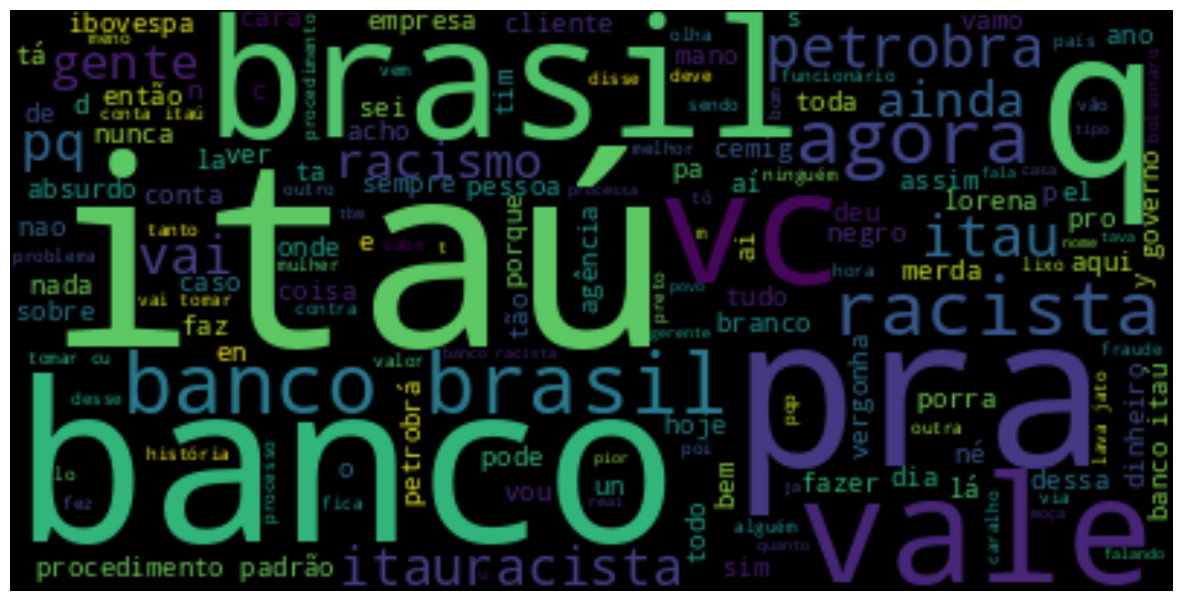

In [ ]:
wordcloud = WordCloud().generate(' '.join(df_no_stopwords.sample(int(df_no_stopwords.shape[0] * 0.2))))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#retirar palavrões
list_palavroes = [ 'animaldeteta', 'babaca', 'baitola', 'benfiquista',
                   'bicha', 'biroska', 'boqueteiro', 'bosta', 'buceta', 'bundao', 'burro',
                   'cabaco', 'cacete', 'cadelona', 'capiroto', 'caralho', 'catraia', 'cu',
                   'debilmental', 'demente', 'desciclope', 'desgracado', 'drogado', 'eguenorante',
                   'endemoniado', 'energumeno', 'enfianocu', 'engolerola', 'escroto', 'fdp', 'fidumaegua',
                   'filhodaputa', '', 'gozado', 'idiota', 'ignorante', 'imbecil', 'jacu', 'kct', 'ku',
                   'lazarento', 'leproso', 'lerdo', 'lesma', 'lezado', 'limpezaanal', 'lixo', 'lombriga',
                   'macaco', 'merda', 'miolodecu', 'n00b', 'otario', 'panaca', 'passaralho', 'paunocu',
                   'piroca', 'porra', 'poha', 'prostituta', 'punheta', 'puta', 'putaquepariu', 'quenga',
                   'retardado', 'tapado', 'tarado', 'tesao', 'tetuda', 'tetudo', 'tragado', 'vadia',
                   'vagabundo',"vagabunda" , 'vagaranha', 'vaiamerda', 'vaisefuder', 'vaitomarnocu',
                  'viado', 'xereca', 'xixizento', 'xoxota', 'xupetinha', 'xupisco', 'zebuceta', 'zoiudo',
                  'krl']

def bad_word(tweet):
  global list_palavroes

  for palavrao in list_palavroes:
      if palavrao in tweet.split():
          return True
  return False

df_no_bad_word = df_no_stopwords[~df_no_stopwords.apply(bad_word)]

In [ ]:
# colocar no final pros espaços ficarem organizados
def organize_spaces(text):
  all_text = text.split()
  return " ".join(all_text)

df_organized = df_no_bad_word.apply(remove_stopwords)

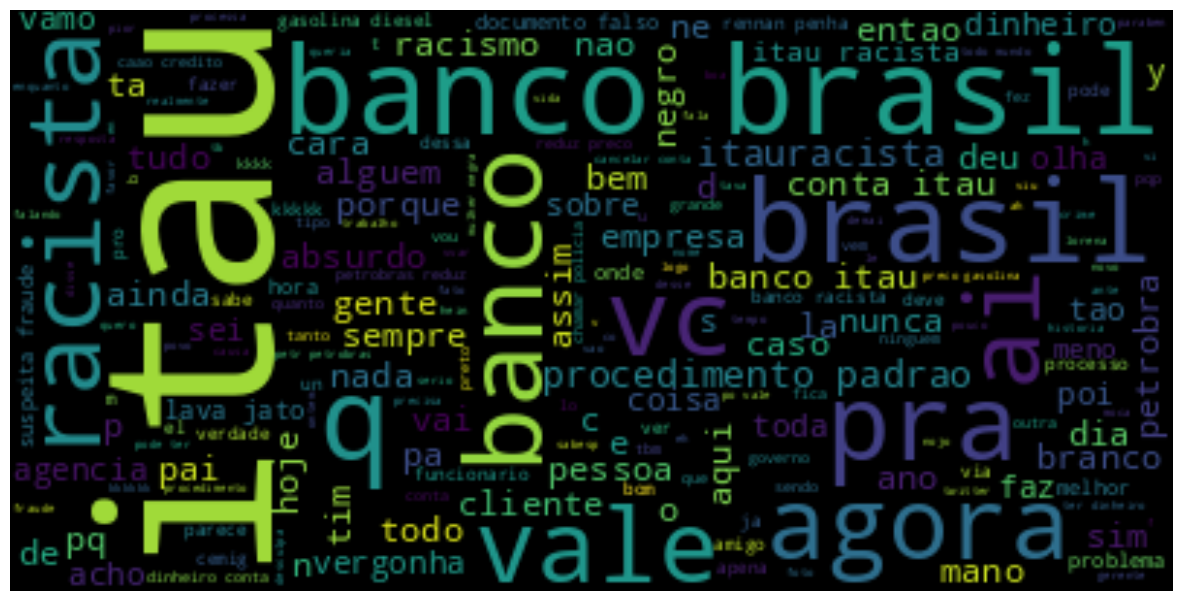

In [ ]:
wordcloud = WordCloud().generate(' '.join(df_organized.sample(int(df_organized.shape[0]))))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Lematização - converter palavras pra sua raiz
#lemma_batch_size: memória
def lematization(text):

  lemma = ""
  nlp = stanza.Pipeline(lang='pt', processors='tokenize,mwt,pos,lemma', lemma_batch_size=2)

  for sent in nlp(text).sentences:
    for word in sent.words:
      lemma += word.lemma + " "

  return lemma

df_lematization = df_organized.apply(lematization)

In [ ]:
wordcloud = WordCloud().generate(' '.join(df_lematization.sample(int(df_lematization.shape[0] * 0.2))))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Quando tiver processado a Lematização substituir o df usado nas próximas células

In [ ]:
#Tokenização

def tokenizer(text):
  return word_tokenize(text)

#df_tokenized = df_lematization.apply(tokenizer)
df_tokenized = df_organized.apply(tokenizer)
df_tokenized

In [ ]:
# TF-IDF

vectorizer = TfidfVectorizer()

vectorizer.fit(df_organized)

# Transformando o texto em vetores TF-IDF
vetores_tfidf = vectorizer.transform(df_organized)

#acessando vocabulário
vocabulario = vectorizer.vocabulary_

# Imprimindo os vetores TF-IDF
print(vetores_tfidf)

# Imprimindo o vocabulário
for palavra, indice in vocabulario.items():
    print(f"Palavra: {palavra}, Índice: {indice}")

In [ ]:
#Bag of words
vectorizer = CountVectorizer()

vectorizer.fit(df_organized)

bow_vectors = vectorizer.transform(df_organized)

vocabulary = vectorizer.vocabulary_

print(len(vocabulary))

# Print the shape of the BoW vectors matrix
print(bow_vectors.shape)

# If you want to see the actual counts for each word in each tweet:
# Use .toarray() to convert the sparse matrix to a NumPy array
bow_array = bow_vectors.toarray()
print(bow_array)

# Access the vocabulary by word index
# For example, to get the word corresponding to index 10:
word = list(vocabulary.keys())[list(vocabulary.values()).index(10)]
print(f"Word at index 10: {word}")